# Explore here

Introduccion:

El objetivo de este ejercicio es realizar un análisis EDA y desarrollar un modelo de árbol de decisiones predictivo para determinar si una persona, desarrollará diabetes o no.


# Paso 1: importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import warnings
import pickle
from pickle import dump
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_classification

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

# Paso 2: Carga del conjunto de datos

In [2]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'

def get_data(URL:str) -> pd.DataFrame:
    total_data = pd.read_csv(URL, sep=',')
    total_data.head()
    return total_data

get_data(URL)
total_data = get_data(URL)

# Paso 3: Exploración y limpieza de datos

Eliminar información duplicada 

In [3]:
#En este caso, no eliminamos ninguna fila porque no hay datos duplicados.
total_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Paso 4: Análisis univariado

Dividiendo nuestro conjunto de datos en categórico y numérico

In [4]:
#No tenemos ninguna variable categórica en este conjunto de datos, por lo que solo trabajaremos con variables numéricas.
numerical_variables = total_data.select_dtypes(include=['number']).columns.tolist()
numerical_variables.remove('Outcome')
print("Numerical Variables:", numerical_variables)

categorical_variables = total_data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_variables.append('Outcome')
print("Categorical Variables:", categorical_variables)

print(total_data.dtypes)

Numerical Variables: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Categorical Variables: ['Outcome']
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Paso 5: Análisis de variables categóricas

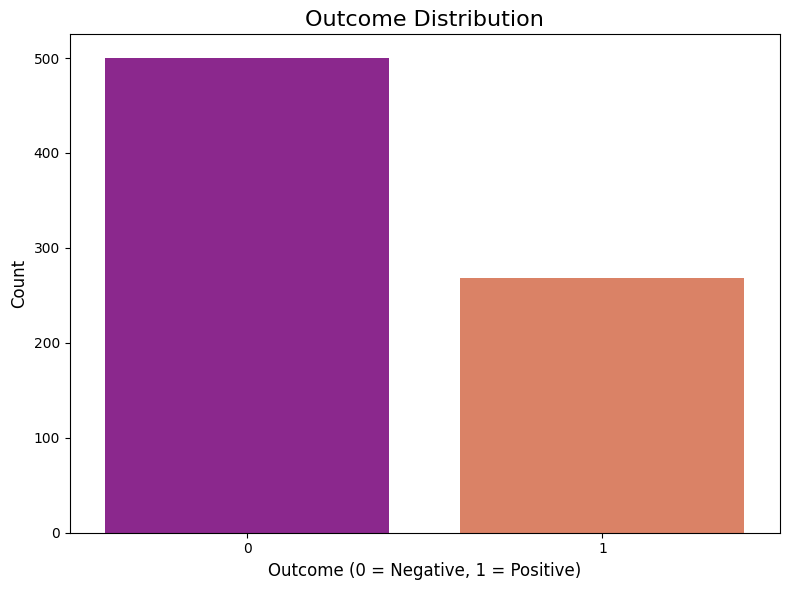

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=total_data, x="Outcome", palette='plasma')
plt.title("Outcome Distribution", fontsize=16)
plt.xlabel("Outcome (0 = Negative, 1 = Positive)", fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

Conclusiones:

Se observa una disparidad significativa entre las dos clases de resultados. 

El conjunto de datos contiene un mayor número de personas sin diabetes (Resultado 0), con un total aproximado de 500, en comparación con aquellas con diagnóstico positivo de diabetes (Resultado 1), que ascienden a alrededor de 260. 

Esto pone de manifiesto un desequilibrio de clase dentro de la variable objetivo. 

Análisis de variables numéricas

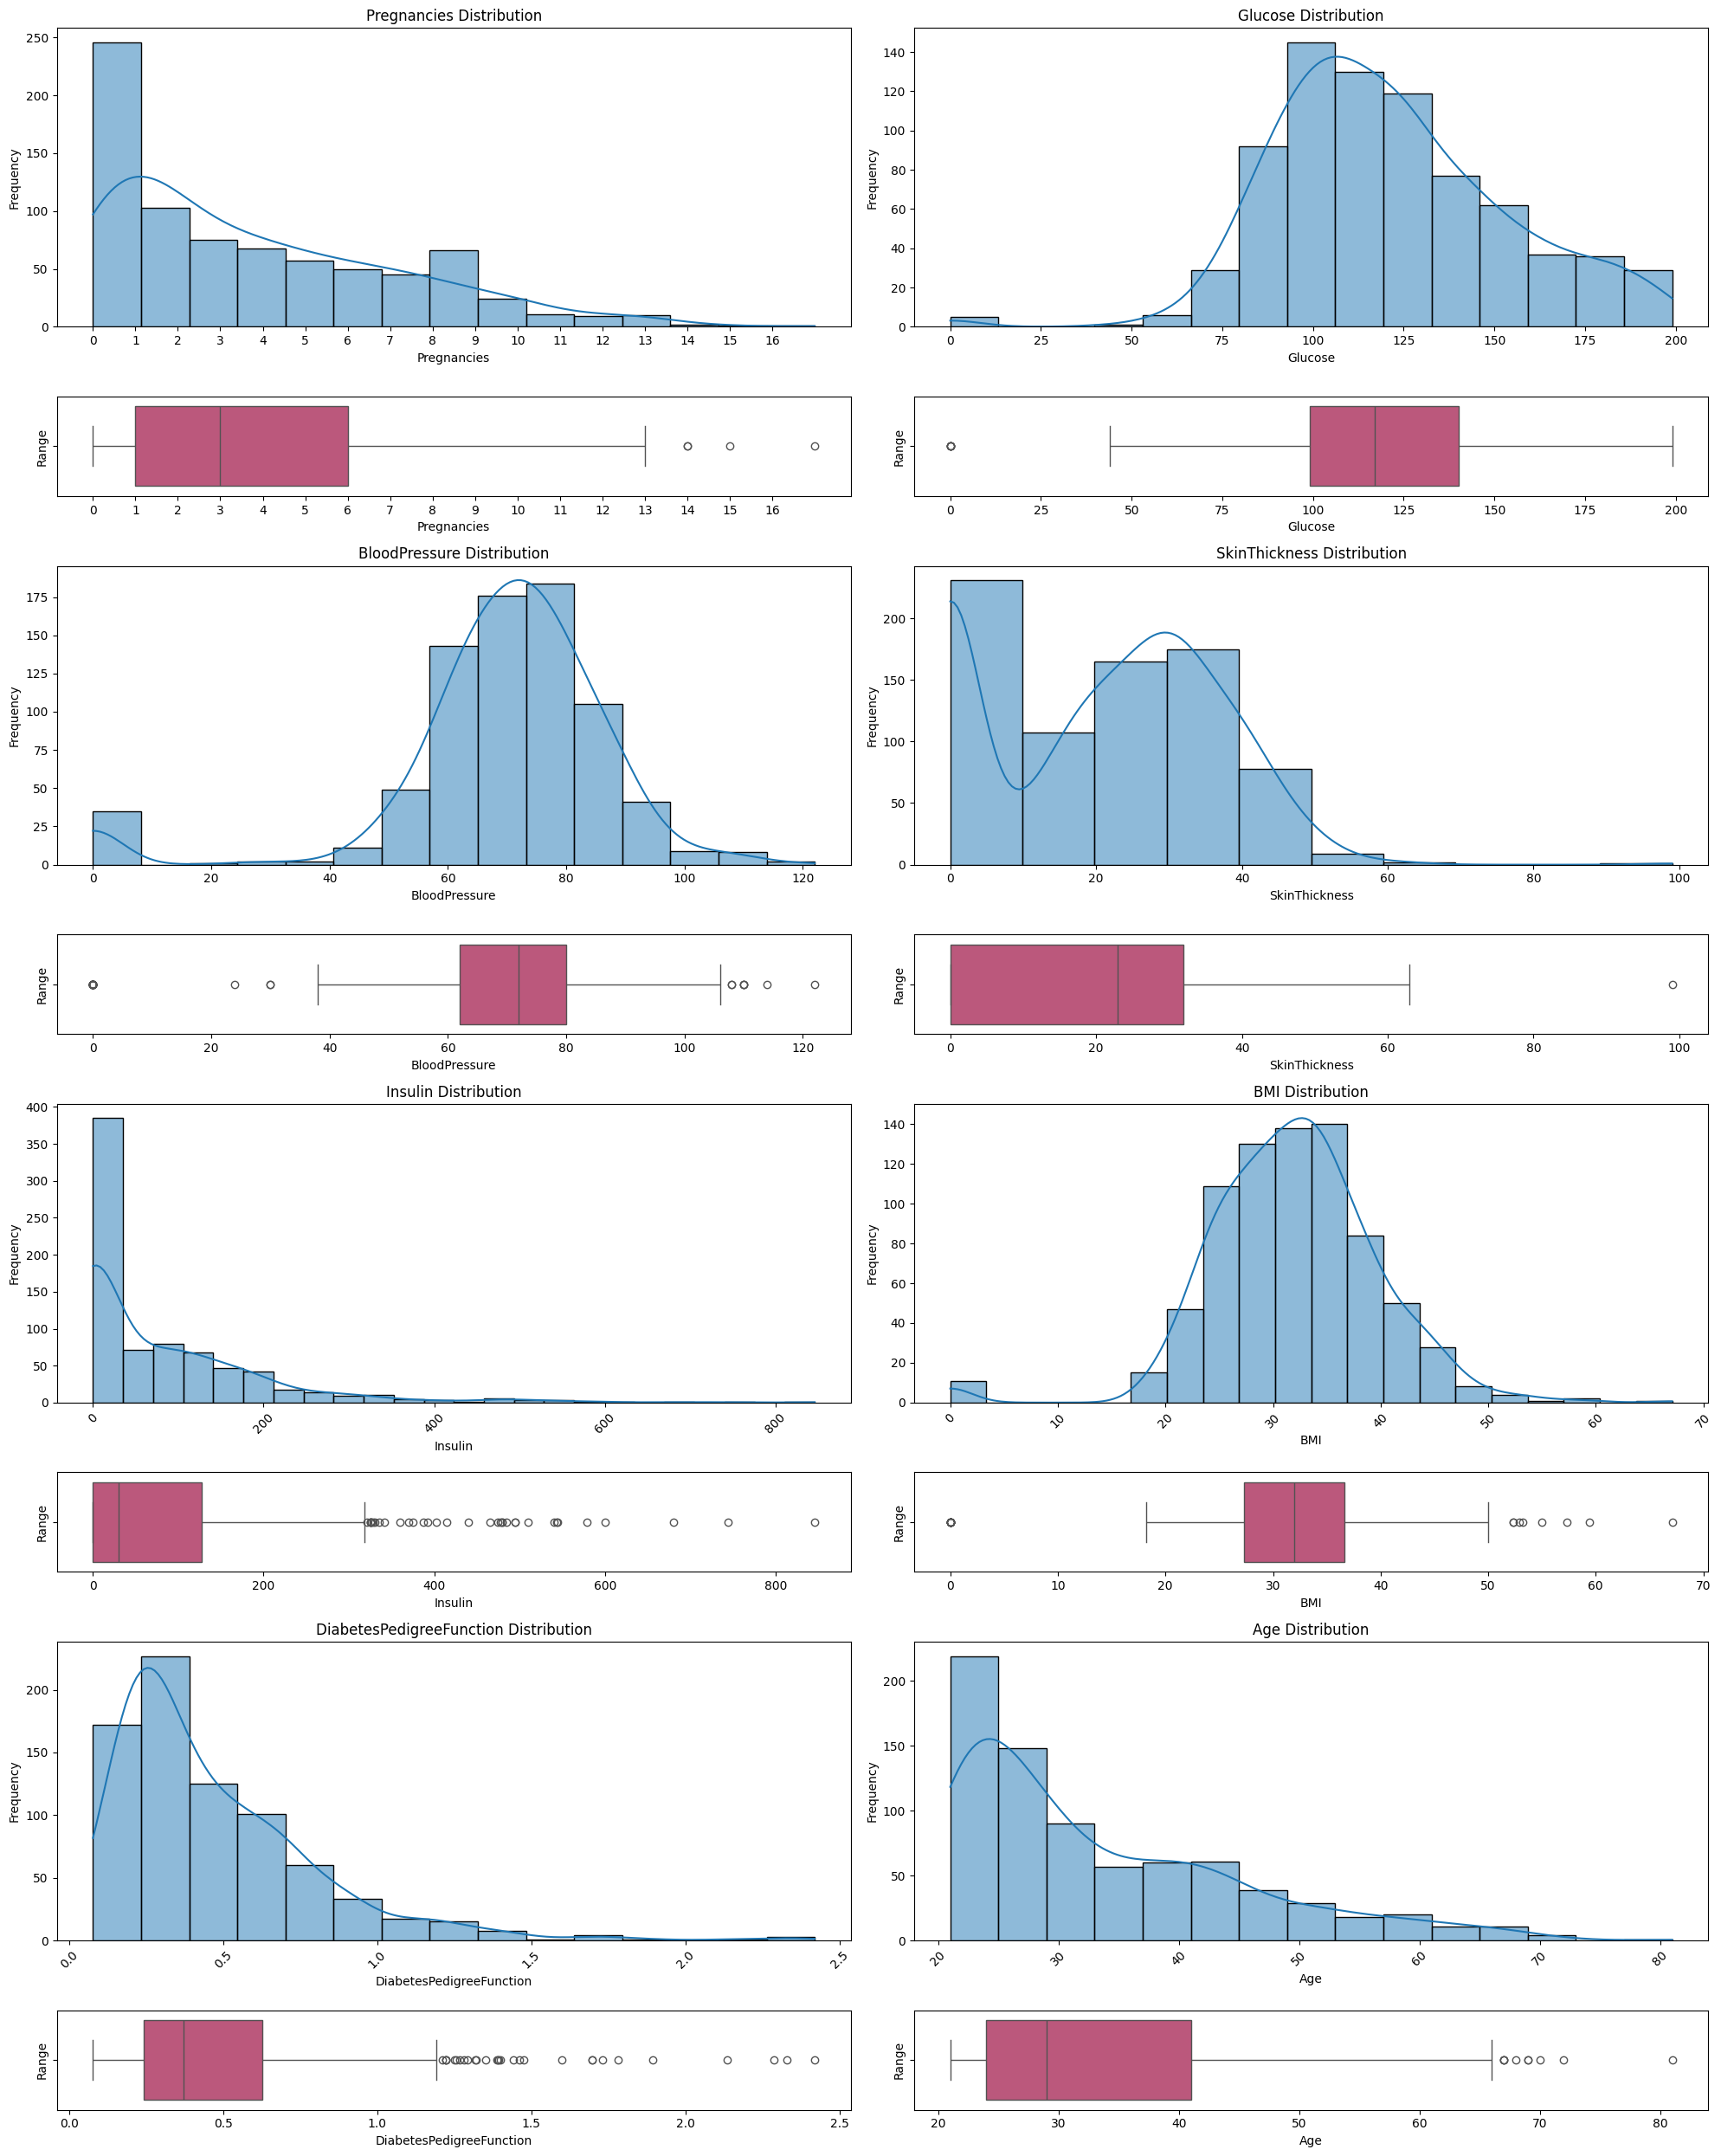

In [ ]:
num_vars = len(numerical_variables)
nrows = num_vars // 2 + (num_vars % 2)
total_rows = nrows * 2
fig, axes = plt.subplots(
    nrows = total_rows,
    ncols=2,
    figsize=(20, 25),
    gridspec_kw={"height_ratios": [6, 2] * nrows}
)


# Columna 0: 'Pregnancies'
# Histplot
sns.histplot(
    data=total_data, x="Pregnancies", kde=True, bins=15, ax=axes[0, 0], palette="plasma"
)
axes[0, 0].set_title("Pregnancies Distribution", fontsize=12)
axes[0, 0].set_ylabel("Frequency", fontsize=10)
x_ticks_pregnancies = np.arange(0, total_data['Pregnancies'].max())
axes[0, 0].set_xticks(x_ticks_pregnancies)

# Boxplot
sns.boxplot(data=total_data, x="Pregnancies", ax=axes[1, 0], palette="plasma")
axes[1, 0].set_ylabel("Range", fontsize=10)
axes[1, 0].tick_params(axis="y", labelleft=False)
axes[1, 0].set_xticks(x_ticks_pregnancies)


# Columna 1: 'Pregnancies'
# Histplot
sns.histplot(
    data=total_data, x="Glucose", kde=True, bins=15, ax=axes[0, 1], palette="plasma"
)
axes[0, 1].set_title("Glucose Distribution", fontsize=12)
axes[0, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="Glucose", ax=axes[1, 1], palette="plasma")
axes[1, 1].set_ylabel("Range", fontsize=10)
axes[1, 1].tick_params(axis="y", labelleft=False)


# Columna 0: 'BloodPressure'
# Histplot
sns.histplot(
    data=total_data, x="BloodPressure", kde=True, bins=15, ax=axes[2, 0], palette="plasma"
)
axes[2, 0].set_title("BloodPressure Distribution", fontsize=12)
axes[2, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="BloodPressure", ax=axes[3, 0], palette="plasma")
axes[3, 0].set_ylabel("Range", fontsize=10)
axes[3, 0].tick_params(axis="y", labelleft=False)


#Columna 1: 'SkinThickness'
# Histplot
sns.histplot(
    data=total_data, x="SkinThickness", kde=True, bins=10, ax=axes[2, 1], palette="plasma"
)
axes[2, 1].set_title("SkinThickness Distribution", fontsize=12)
axes[2, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="SkinThickness", ax=axes[3, 1], palette="plasma")
axes[3, 1].set_ylabel("Range", fontsize=10)
axes[3, 1].tick_params(axis="y", labelleft=False)


#Columna 0: 'Insulin'
# Histplot
sns.histplot(
    data=total_data, x="Insulin", kde=True, bins=24, ax=axes[4, 0], palette="plasma"
)
axes[4, 0].set_title("Insulin Distribution", fontsize=12)
axes[4, 0].set_ylabel("Frequency", fontsize=10)
axes[4, 0].tick_params(axis="x", rotation=45)

# Boxplot
sns.boxplot(data=total_data, x="Insulin", ax=axes[5, 0], palette="plasma")
axes[5, 0].set_ylabel("Range", fontsize=10)
axes[5, 0].tick_params(axis="y", labelleft=False)


#Columna 1: 'BMI'
# Histplot
sns.histplot(
    data=total_data, x="BMI", kde=True, bins=20, ax=axes[4, 1], palette="plasma"
)
axes[4, 1].set_title("BMI Distribution", fontsize=12)
axes[4, 1].set_ylabel("Frequency", fontsize=10)
axes[4, 1].tick_params(axis="x", rotation=45)

# Boxplot
sns.boxplot(data=total_data, x="BMI", ax=axes[5, 1], palette="plasma")
axes[5, 1].set_ylabel("Range", fontsize=10)
axes[5, 1].tick_params(axis="y", labelleft=False)


# Columna 0: 'DiabetesPedigreeFunction'
# Histplot
sns.histplot(
    data=total_data, x="DiabetesPedigreeFunction", kde=True, bins=15, ax=axes[6, 0], palette="plasma"
)
axes[6, 0].set_title("DiabetesPedigreeFunction Distribution", fontsize=12)
axes[6, 0].set_ylabel("Frequency", fontsize=10)
axes[6, 0].tick_params(axis="x", rotation=45)

# Boxplot
sns.boxplot(data=total_data, x="DiabetesPedigreeFunction", ax=axes[7, 0], palette="plasma")
axes[7, 0].set_ylabel("Range", fontsize=10)
axes[7, 0].tick_params(axis="y", labelleft=False)


# Columna 1: 'Age'
# Histplot
sns.histplot(
    data=total_data, x="Age", kde=True, bins=15, ax=axes[6, 1], palette="plasma"
)
axes[6, 1].set_title("Age Distribution", fontsize=12)
axes[6, 1].set_ylabel("Frequency", fontsize=10)
axes[6, 1].tick_params(axis="x", rotation=45)

# Boxplot
sns.boxplot(data=total_data, x="Age", ax=axes[7, 1], palette="plasma")
axes[7, 1].set_ylabel("Range", fontsize=10)
axes[7, 1].tick_params(axis="y", labelleft=False)

plt.tight_layout()
plt.show()

*Conclusiones:*

-Pregnancies: La mayoría de los individuos no ha tenido embarazos; la distribución está sesgada a la derecha.

-Glucose: Muchos individuos presentan niveles de glucosa por encima del rango normal (70–100 mg/dL), lo que indica riesgo de diabetes.

-Blood Pressure: Distribución normal entre 70 y 80 mmHg, aunque hay varios registros con valor 0, probablemente por falta de datos o errores.

-Skin Thickness: Predominan valores entre 20 y 40 mm, con algunos casos extremos y posibles datos faltantes o incorrectos (valores en 0).

-Insulin: La mayoría tiene niveles bajos, pero hay valores atípicos altos y muchos registros con valor 0, lo cual puede reflejar casos de diabetes tipo 1 o datos faltantes.

-BMI: Distribución normal entre 22 y 37 kg/m². Se observa sobrepeso y obesidad en muchos individuos, lo que implica riesgo de diabetes.

-Diabetes Pedigree Function: La mayoría presenta riesgo moderado por antecedentes familiares (alrededor de 0.5), aunque algunos tienen riesgo alto.

-Age: La mayoría tiene entre 20 y 50 años; hay pocos individuos mayores de 70. Distribución sesgada a la derecha.

# Paso 5: Análisis multivariado

Encoding Categorical Values and Saving JSON Files

Dado que la única variable categórica disponible es la variable objetivo, y esta ya está codificada, no se requiere codificación adicional. Donde 0 representa que el individuo no tiene diabetes y 1 representa que el individuo tiene diabetes.

Numerical-Categorical Analysis

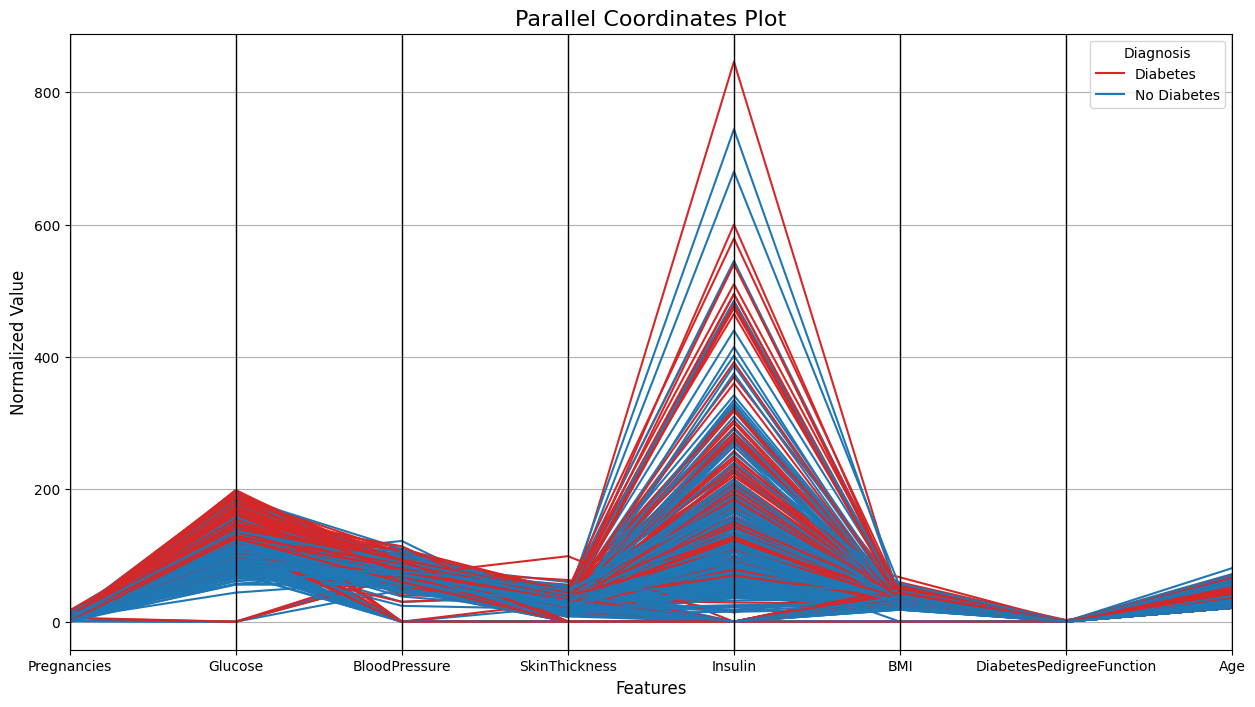

In [24]:
plt.figure(figsize=(15,8))

ax = pd.plotting.parallel_coordinates(total_data, "Outcome", color=['#d62728', '#1f77b4'])
handles, labels = ax.get_legend_handles_labels()
labels = ["Diabetes", "No Diabetes"]
ax.legend(handles, labels, title="Diagnosis")
plt.title('Parallel Coordinates Plot', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)

plt.show()

*Conclusiones:*

La insulina es la variable que tiene el mayor impacto en la variable objetivo, seguida de la glucosa, con un impacto más moderado.

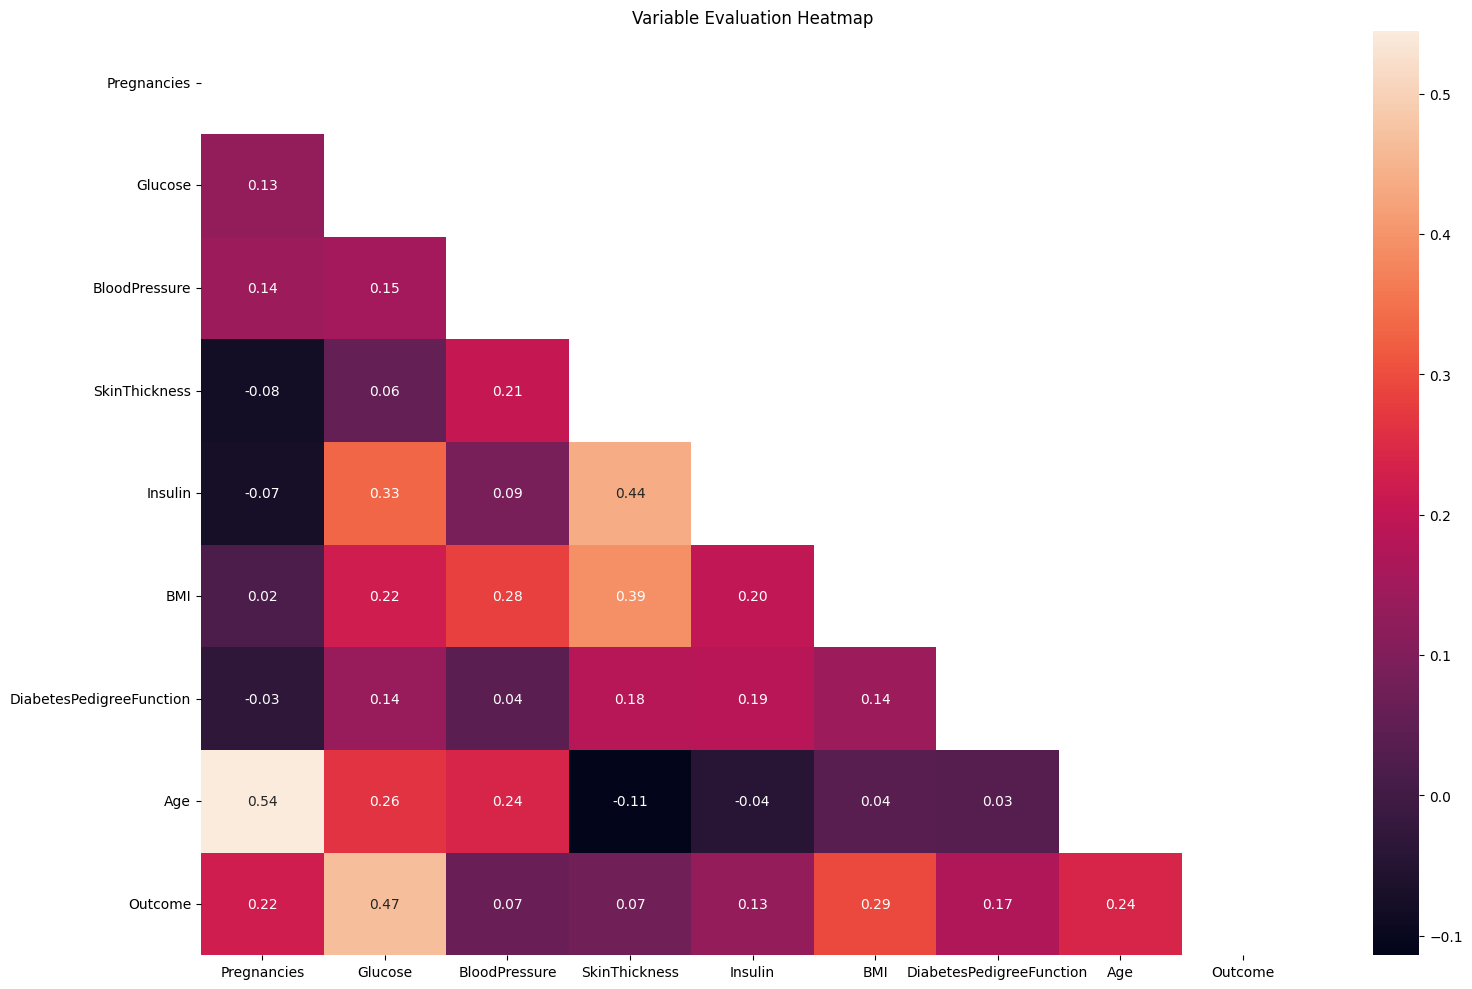

In [8]:
plt.figure(figsize=(16,10))
columns = total_data.columns
sns.heatmap(total_data[columns].corr(), annot = True, fmt = ".2f", mask=np.triu(total_data[columns].corr()))
plt.title('Variable Evaluation Heatmap')
plt.tight_layout()
plt.show()

*Conclusiones:*

Mayor correlación positiva con 'Outcome': No existe una correlación positiva con la variable 'Outcome', lo que indica que ninguna de las variables numéricas tiene una relación positiva fuerte con la probabilidad de desarrollar diabetes.

Mayor correlación negativa con 'Outcome': La glucosa presenta la correlación negativa más fuerte con la variable 'Outcome', con un coeficiente de correlación de -0.47. Esto sugiere que niveles más altos de glucosa están asociados con un diagnóstico de diabetes, lo cual es esperado, ya que la glucosa elevada es un indicador clave de la enfermedad.

Otras correlaciones negativas significativas con 'Outcome': El IMC, la edad, el número de embarazos e insulina también muestran correlaciones negativas importantes con 'Outcome', con coeficientes de -0.29, -0.24, -0.22, -0.21 y -0.13 respectivamente. Esto indica que valores más altos en estas variables están asociados con una mayor probabilidad de desarrollar diabetes, lo cual es esperado ya que son factores de riesgo conocidos.

# Paso 6: Ingeniería de características

Nueva inferencia de características

No se crearán nuevas características en este análisis, ya que el conjunto actual de variables se considera suficiente para capturar con precisión las relaciones y los conocimientos necesarios para predecir condiciones médicas.

Analisis de Outliers

In [9]:
total_data.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Tenemos que eliminar los valores outliers de todas las variables.


In [10]:
total_data_WITH_outliers = total_data.copy()

total_data_WITHOUT_outliers = total_data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: (x if (x <= upper_limit) else upper_limit) if not pd.isna(x) else np.nan)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: (x if (x >= lower_limit) else lower_limit) if not pd.isna(x) else np.nan)
  return df.copy(), {"lower_limit": lower_limit, "upper_limit": upper_limit}

outliers_dict = {}

output_dir = os.path.join('outliers_lims')
os.makedirs(output_dir, exist_ok=True)

for column in total_data.columns:
  total_data_WITHOUT_outliers, limit_list = replace_outliers_from_column(column, total_data_WITHOUT_outliers)
  outliers_dict[column] = limit_list
  filename_outliers = f'./outliers_lims/{column}.json'
  with open(filename_outliers, "w") as f:
        json.dump(limit_list, f, indent=4)

Diferencia entre ambos marcos de datos (con valores outliers y sin valores outliers)

In [11]:
total_data_WITHOUT_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [12]:
total_data_WITH_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Dividir el entrenamiento/prueba de ambos marcos de datos

Dividir el conjunto de datos en conjuntos de entrenamiento (train) y prueba (test). Esto es fundamental por dos razones principales:

-Prevenir el sobreajuste:
Permite que el modelo aprenda patrones útiles y no solo memorice los datos del entrenamiento.

-Evaluar la generalización:
Ayuda a medir qué tan bien funcionará el modelo con datos nuevos y reales.

In [13]:
def split(target, df, reference: str, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    X_train.to_excel(f'../data/processed/X_train_{reference}.xlsx', index=False)
    X_test.to_excel(f'../data/processed/X_test_{reference}.xlsx', index=False)
    y_train.to_excel('../data/processed/y_train.xlsx', index=False)
    y_test.to_excel('../data/processed/y_test.xlsx', index=False)

    return X_train, X_test, y_train, y_test

In [14]:
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('Outcome', total_data_WITH_outliers, 'with_outliers')
X_train_without_outliers, X_test_without_outliers, _, _ = split('Outcome', total_data_WITHOUT_outliers, 'without_outliers')

try:
    X_train_with_outliers = pd.read_excel('../data/processed/X_train_with_outliers.xlsx')
    X_train_without_outliers = pd.read_excel('../data/processed/X_train_without_outliers.xlsx')

    X_test_with_outliers = pd.read_excel('../data/processed/X_test_with_outliers.xlsx')
    X_test_without_outliers = pd.read_excel('../data/processed/X_test_without_outliers.xlsx')


    # Cargar y_train y y_test (estos son comunes para todos los X)
    y_train = pd.read_excel('../data/processed/y_train.xlsx').squeeze()
    y_test = pd.read_excel('../data/processed/y_test.xlsx').squeeze()

    print("All .xlsx variables readed successfully")

except FileNotFoundError:
    print("Error: Not all preprocessed data files were found..")
except Exception as e:
    print("Unexpected error: ", e)

All .xlsx variables readed successfully


# Paso 7: Data Processing 

Normalización

Procederemos a normalizar y guardar ambos marcos de datos con y sin valores outliers.

In [15]:
def norm(X_train:pd.DataFrame, X_test:pd.DataFrame, reference:str):
    scaler = StandardScaler()
    scaler.fit(X_train)

    scaler_filename = os.path.join('../models', f'scaler_{reference}.pkl')
    with open(scaler_filename, "wb") as file:
        pickle.dump(scaler, file)

    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
    X_train_norm.to_excel(f'../data/processed/X_train_{reference}_norm.xlsx', index=False)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)
    X_test_norm.to_excel(f'../data/processed/X_test_{reference}_norm.xlsx', index=False)

    return X_train_norm, X_test_norm

X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

X_train_without_outliers_norm.head()

try:
    X_train_with_outliers_norm = pd.read_excel('../data/processed/X_train_with_outliers_norm.xlsx')
    X_train_without_outliers_norm = pd.read_excel('../data/processed/X_train_without_outliers_norm.xlsx')

    X_test_with_outliers_norm = pd.read_excel('../data/processed/X_test_with_outliers_norm.xlsx')
    X_test_without_outliers_norm = pd.read_excel('../data/processed/X_test_without_outliers_norm.xlsx')

    print("All .xlsx variables readed successfully")

except FileNotFoundError:
    print("Error: Not all preprocessed data files were found..")
except Exception as e:
    print("Unexpected error: ", e)

All .xlsx variables readed successfully


Escalado Minmax

In [16]:
def minmax(X_train:pd.DataFrame, X_test:pd.DataFrame, reference:str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)

    scaler_filename = os.path.join('../models', f'scaler_{reference}.pkl')
    with open(scaler_filename, "wb") as file:
        pickle.dump(scaler, file)

    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)
    X_train_minmax.to_excel(f'../data/processed/X_train_{reference}_minmax.xlsx', index=False)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    X_test_minmax.to_excel(f'../data/processed/X_test_{reference}_minmax.xlsx', index=False)

    return X_train_minmax, X_test_minmax

X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

X_train_without_outliers_minmax.head()

try:
    X_train_with_outliers_minmax = pd.read_excel('../data/processed/X_train_with_outliers_minmax.xlsx')
    X_train_without_outliers_minmax = pd.read_excel('../data/processed/X_train_without_outliers_minmax.xlsx')

    X_test_with_outliers_minmax = pd.read_excel('../data/processed/X_test_with_outliers_minmax.xlsx')
    X_test_without_outliers_minmax = pd.read_excel('../data/processed/X_test_without_outliers_minmax.xlsx')

    print("All .xlsx variables readed successfully")

except FileNotFoundError:
    print("Error: Not all preprocessed data files were found..")
except Exception as e:
    print("Unexpected error: ", e)

All .xlsx variables readed successfully


# Paso 8: Machine Learning

¿Cuál es el mejor dataset

In [17]:
results = []

dataset_references = {
    "X_train_with_outliers": (X_train_with_outliers, X_test_with_outliers),
    "X_train_without_outliers": (X_train_without_outliers, X_test_without_outliers),
    "X_train_with_outliers_norm": (X_train_with_outliers_norm, X_test_with_outliers_norm),
    "X_train_without_outliers_norm": (X_train_without_outliers_norm, X_test_without_outliers_norm),
    "X_train_with_outliers_minmax": (X_train_with_outliers_minmax, X_test_with_outliers_minmax),
    "X_train_without_outliers_minmax": (X_train_without_outliers_minmax, X_test_without_outliers_minmax),
}

for dataset_name, (X_train, X_test) in dataset_references.items():
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        "dataset_name": dataset_name,
        "accuracy": accuracy
    })

results_df = pd.DataFrame(results).sort_values(by='accuracy', ascending=False)
print(results_df)
winning_dataset_name = results_df.iloc[0]["dataset_name"]
winning_dataset_X_train, best_X_test = dataset_references[winning_dataset_name]
print(f'The best dataset is {winning_dataset_name} with a {accuracy * 100:.4f}% of accuracy')

                      dataset_name  accuracy
0            X_train_with_outliers  0.798701
2       X_train_with_outliers_norm  0.798701
4     X_train_with_outliers_minmax  0.798701
1         X_train_without_outliers  0.779221
3    X_train_without_outliers_norm  0.779221
5  X_train_without_outliers_minmax  0.779221
The best dataset is X_train_with_outliers with a 77.9221% of accuracy


Ahora podemos visualizar cómo funciona el modelo de árbol de decisión. Para esta tarea, limitaremos la profundidad y las hojas para ver el árbol de decisión con mayor claridad.

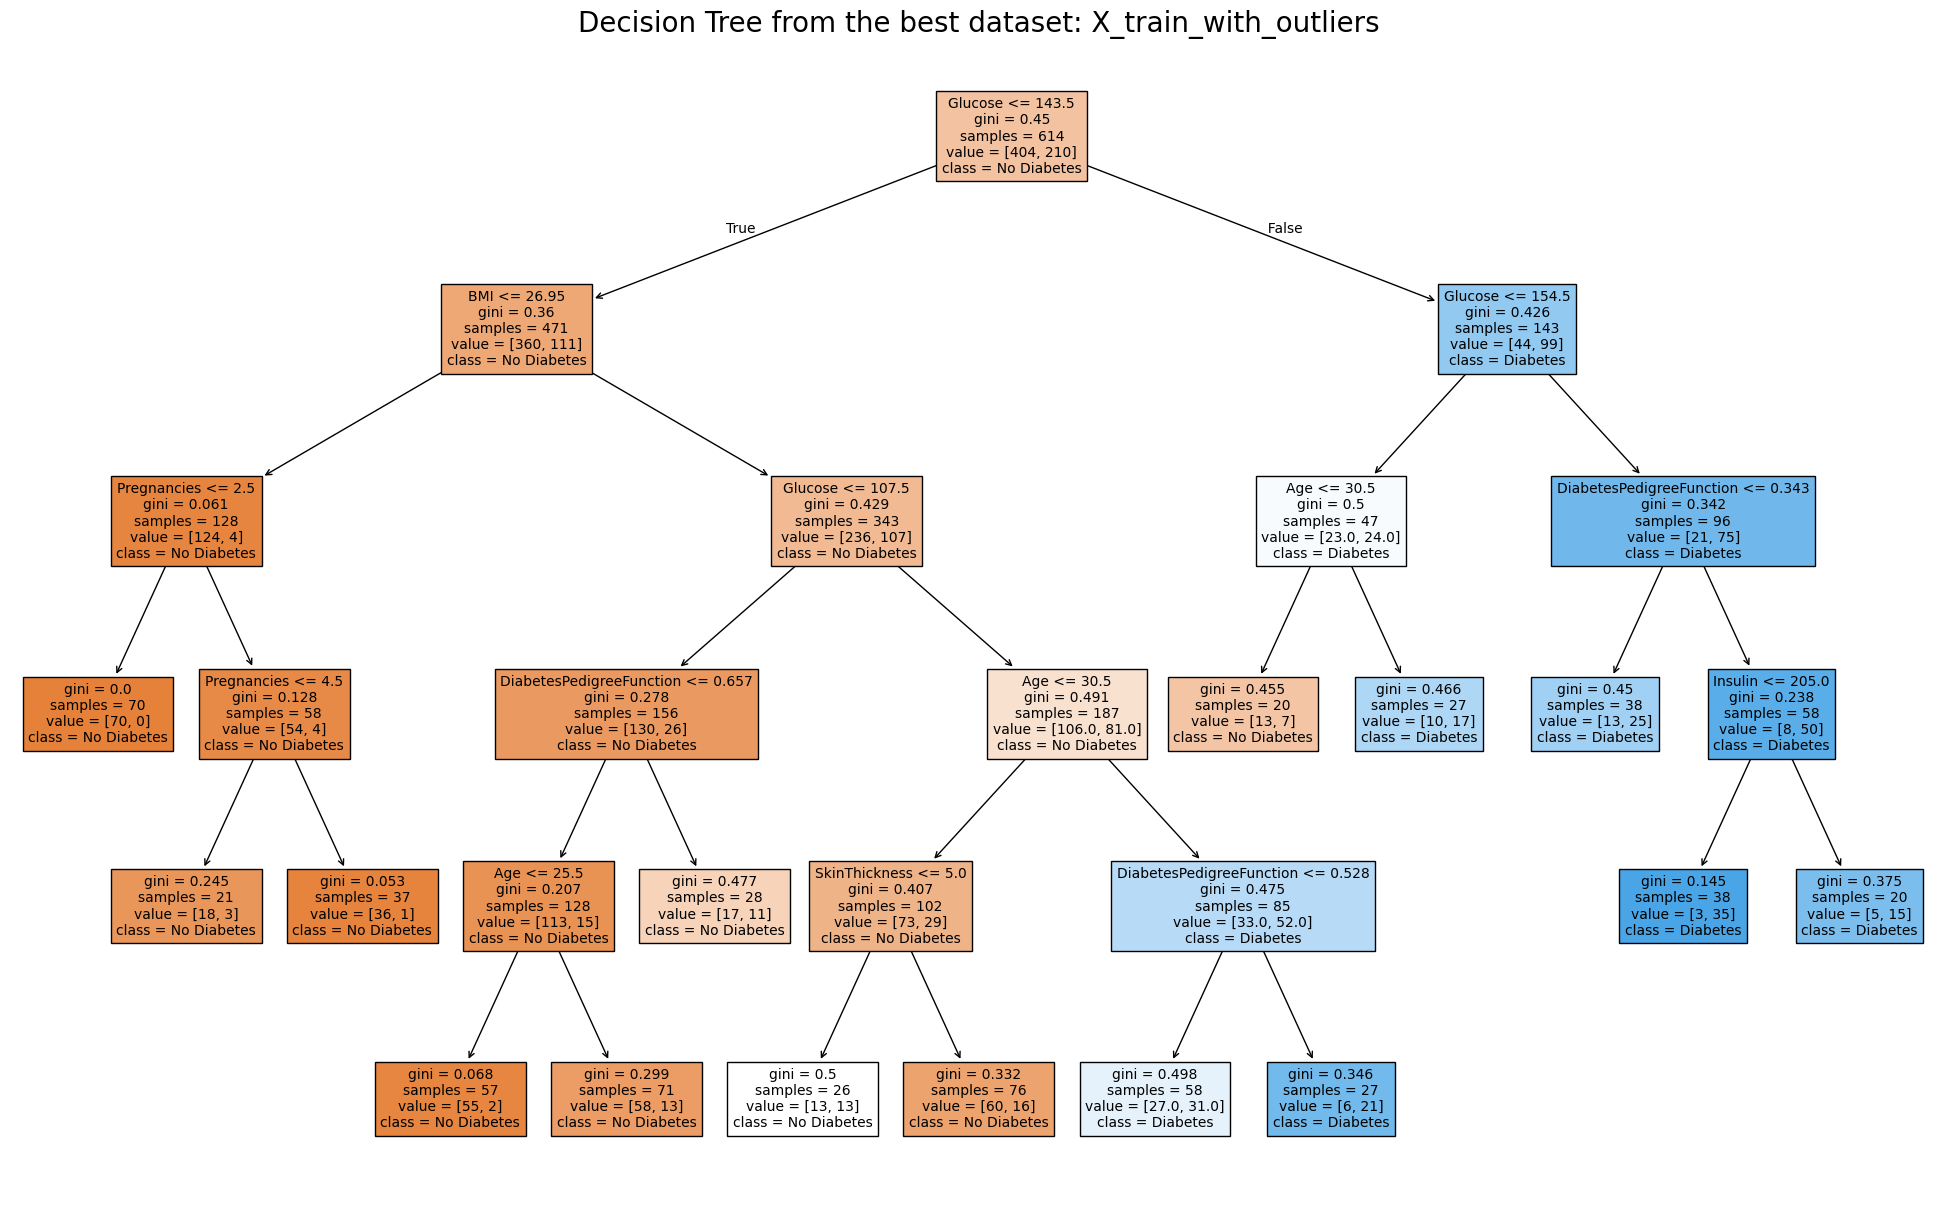

In [18]:
best_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=20)
best_model.fit(winning_dataset_X_train, y_train)

plt.figure(figsize=(25, 15))
plot_tree(
    best_model,
    feature_names=winning_dataset_X_train.columns.tolist(),
    class_names=['No Diabetes', 'Diabetes'],
    filled=True,
    fontsize=10
)
plt.title(f'Decision Tree from the best dataset: {winning_dataset_name}', fontsize=20)
plt.show()

# PASO 9: Optimización del modelo

In [19]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

dt_classifier = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(winning_dataset_X_train, y_train)

best_hyperparameters = grid_search.best_params_
best_score = grid_search.best_score_
final_model = grid_search.best_estimator_

print(f"\nBest Hyperparameters found: {best_hyperparameters}")
print(f"Best cross-validation accuracy: {best_score * 100:.4f}%")

route = '../models/'
optimized_model_filename = os.path.join(route, f'optimized_decision_tree_model_{winning_dataset_name}.pkl')
with open(optimized_model_filename, 'wb') as file:
    dump(final_model, file)
print(f'Optimized model saved successfully as: {optimized_model_filename}')

Fitting 5 folds for each of 270 candidates, totalling 1350 fits

Best Hyperparameters found: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 73.7865%
Optimized model saved successfully as: ../models/optimized_decision_tree_model_X_train_with_outliers.pkl


Evaluación del modelo

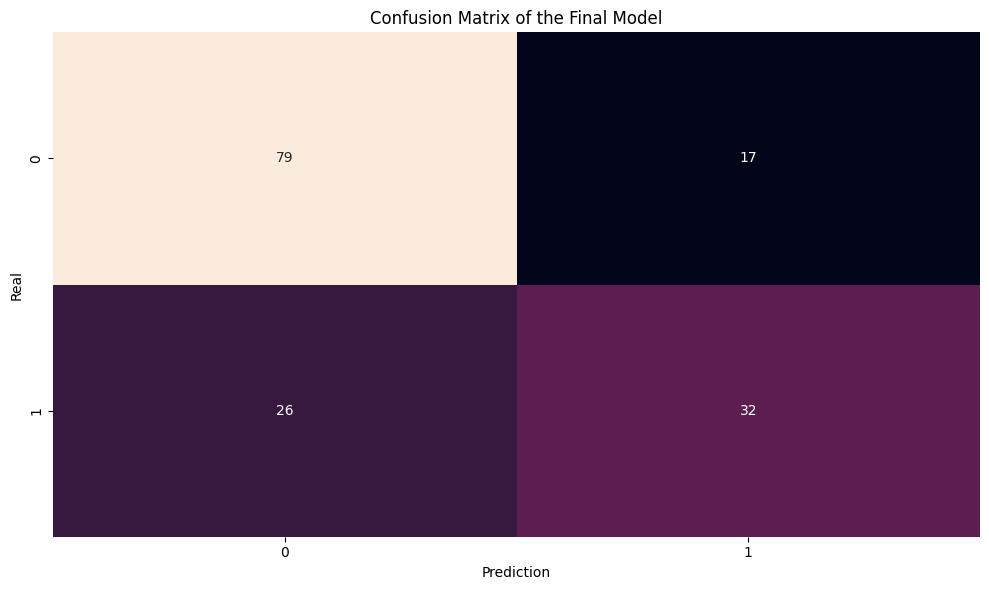


Model Prediction Results:
True Negatives (TN): 79 individuals correctly predicted as NOT diabetics
True Positives (TP): 32 individuals correctly predicted as diabetics
False Positives (FP): 17 individuals incorrectly predicted as diabetics when they aren't
False Negatives (FN): 26 individuals incorrectly predicted as diabetics when they are

Accuracy of the final model: 72.0779%
Classification report               precision    recall  f1-score   support

           0       0.75      0.82      0.79        96
           1       0.65      0.55      0.60        58

    accuracy                           0.72       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.71      0.72      0.72       154



In [20]:
y_pred_test = final_model.predict(best_X_test)
classification_rep = classification_report(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(10, 6))
plt.title('Confusion Matrix of the Final Model')
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()

print("\nModel Prediction Results:")
print("True Negatives (TN):", f"{tn} individuals correctly predicted as NOT diabetics")
print("True Positives (TP):", f"{tp} individuals correctly predicted as diabetics")
print("False Positives (FP):", f"{fp} individuals incorrectly predicted as diabetics when they aren't")
print("False Negatives (FN):", f"{fn} individuals incorrectly predicted as diabetics when they are\n")
print(f"Accuracy of the final model: {test_accuracy*100:.4f}%")
print('Classification report', classification_rep)